# Homework 4

Homework 4 is a group assignment, you may work in groups of up to 3. Please tell Dr. Parlett who is in your group, and add yourself to the HW4 groups on canvas. **IF** you add you and your groupmates to a group on canvas, only one of you needs to turn in the files. If you do not add yourselves to a group **EACH GROUP MEMBER** must submit a copy of all of the files.

You will be turning in:

1. A [README.md](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Admin/READMEexample.md) with all the relevant information
2. An .ipynb or .py with just your code (show all code necessary for the analysis, but remove superfluous code)
3. A PDF with your Report (rendered via Quarto or Google Docs)


In [2]:
from keras.datasets import mnist
import tensorflow.keras as kb
from tensorflow.keras import backend
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from matplotlib import pyplot as plt

# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

# performance
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, accuracy_score #model evaluation
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut


%matplotlib inline

## Data
We're going to build a Neural Network to predict which number a picture is of. The possible digits are 0,1,2,3,4,5,6,7,8, or 9. Each image contains only one digit, and has 784 pixels (it's a 28x28 grayscale image). We're going to treat each pixel as a feature. So think of it like having 784 columns. Each column tells you the color value of that pixel in the image.


<center><img src="https://drive.google.com/uc?export=view&id=1KyFXUVjD7iLJgQYKwr-vWZp5HeAXEHuo" alt="mnist data" width = "500px" /></center>


## Modelling
### Logistic Regression
- Using sklearn `Pipelines`, build a logistic regression model to predict digit (similarly to how we built a Decision Tree in class).
- Print out the accuracy (`accuracy_score`) for both the train and test sets.


### Deep Neural Network
- Take the Neural Network we built together in class and make it DEEP. Add *at least* 5 **more** `Dense` layers to your model. Remember, we typically go from more units to less units.
- Train the model for at least 100 Epochs (this may take a while)
- Print out the accuracy score (`model.evaluate()`) for both the train and test sets


## Questions

Now that you've built your models, answer these questions to help your group learn more about Neural Networks. Some of these questions may require you to do some outside research with your group, others might require information from the lecture, and others are about the models you built. Put the answer to these questions in your **Results** section in your report.

1. How do your models perform (discuss accuracy, overfitting for both train/test)? Is one model better than the other? Are you surprised by which one did better?
2. What happens to the loss and accuracy of your train/test set as you go through all 100 epochs (include a plot of the loss over time for both train and set set, and a plot of the accuracy over time for both train and set set)?
3. 💻 What is the job of a loss function in general? What specific **loss function** does your model use? Why is this loss function appropriate for predicting digits (0-9)
4. 💻 What is an activation function? What activation function did we use in your Neural Network? Why is this activation function appropriate for predicting digits (0-9)
5. The first argument in any `Dense()` layer is the number of nodes in that layer. How many nodes does your last Neural Network layer have? Why did we choose that number?
6. If you had more complicated images, like images of pets which you're classifying as "Corgi" or "Not Corgi", do you think a logistic regression would do well? Why or Why not.
7. What's the benefit of using Deep Neural Networks compared to simpler models like Logistic Regression, Decision Trees...etc?








In [3]:
# load and rescale the data so that the pixel values are between 0-1

# load data
((trainX, trainY), (testX, testY)) = mnist.load_data()

# reshape data to be individual columns instead of image matrix
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

# rescale data to be 0-1 instead of 0-255
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# change the labels to be in the one-hot-encoded format
lb = LabelBinarizer()
trainYnn = lb.fit_transform(trainY)
testYnn = lb.transform(testY)

# [1,0,0,0,0,0,0,0,0,0] #0
# [0,1,0,0,0,0,0,0,0,0] #1
# [0,0,0,0,0,0,0,0,0,1] #9

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# build structure of the model
model = kb.Sequential([
    kb.layers.Input(shape = [784]), # input layer
    kb.layers.Dense(600), #hidden layer
    kb.layers.Dense(500), #hidden layer
    kb.layers.Dense(350), #hidden layer
    kb.layers.Dense(200), #hidden layer
    kb.layers.Dense(100), #hidden layer
    kb.layers.Dense(50), #hidden layer
    kb.layers.Dense(10, activation = "softmax") #output layer
    # activation function is "softmax"
])

# compile model
model.compile(loss="categorical_crossentropy", # loss function
              optimizer=kb.optimizers.SGD(0.01), # the optimizer for the model, don't change
	            metrics=["accuracy"]) # asks the model to grab accuracy

#fit the model (same as sklearn)
history = model.fit(trainX, # input, all the pixels
          trainYnn, # output, the digit, 0-9
          epochs = 100, # how long to train the model
          validation_data=(testX, testYnn)) # test set X and y

# model.evaluate(trainX, trainYnn)
model.evaluate(testX, testYnn)

Epoch 1/100
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3922 - accuracy: 0.8857 - val_loss: 0.3219 - val_accuracy: 0.9117
Epoch 2/100
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3117 - accuracy: 0.9124 - val_loss: 0.2895 - val_accuracy: 0.9180
Epoch 3/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3003 - accuracy: 0.9145 - val_loss: 0.2967 - val_accuracy: 0.9154
Epoch 4/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2929 - accuracy: 0.9175 - val_loss: 0.3027 - val_accuracy: 0.9129
Epoch 5/100
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2870 - accuracy: 0.9197 - val_loss: 0.2867 - val_accuracy: 0.9187
Epoch 6/100
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2838 - accuracy: 0.9210 - val_loss: 0.2902 - val_accuracy: 0.9177
Epoch 7/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2797 - accuracy: 0.9217 - val_loss: 0.28

[0.2863829731941223, 0.9228000044822693]

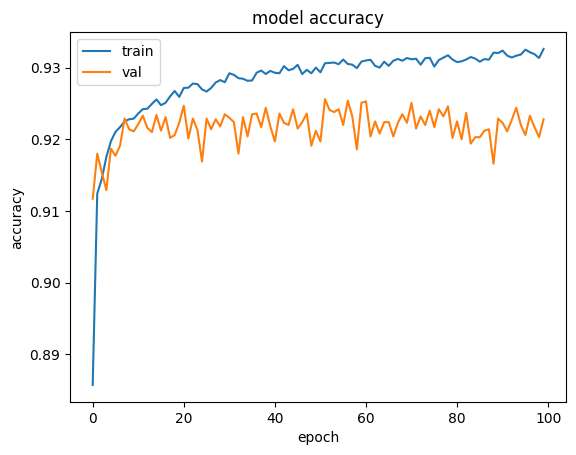

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# to plot loss instead of accuracy, change all the "accuracy" strings to be "loss"

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9256


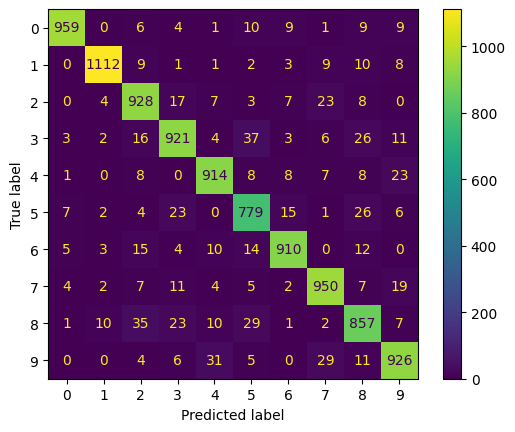

In [6]:
# create empty model
dt = LogisticRegression()
pipe = Pipeline([("lr", dt)])

# notice we're using trainY not trainYnn

pipe.fit(trainX, # input, all the pixels
          trainY) # output, which digit, 0,1,2,3,4,5,6,7,8 or 9

print(accuracy_score(pipe.predict(testX), testY))
ConfusionMatrixDisplay.from_predictions(pipe.predict(testX), testY)


## 3. Report

[QUARTO TEMPLATE HERE](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Homework/Homework4Template.qmd)

[DOCS TEMPLATE HERE](https://docs.google.com/document/d/1lCTtpS0Yw-3LMh2QlfVvmZ_5u1_HXtCHnhBPRxlfvqs/edit?usp=sharing)

Your Technical Report is a way to practice presenting and formatting your results like you would in industry. Make sure your report and **plots** are clear, and explain things clearly. Write a report that has the following sections:

1. **Introduction**: description of the problem (e.g. what are you predicting? How might this model be useful if you are successful). You should end with a sentence or two about what the impact of these models could be.

2. **Methods**: describe your models in detail (as if explaining them to someone who's not a data scientist, like a CEO), as well as any pre-processing you had to do to the data.

3. **Results**: Describe the performance of your models, and answer the questions listed in the cell above.

4. **Discussion/Reflection**: A few sentences about what you learned from performing these analyses, and at least one suggestion for what you'd add or do differently if you were to perform this analysis again in the future.